In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from affinewarp import AffineWarping
data = np.random.randn(10, 11, 12)
model = AffineWarping(data)

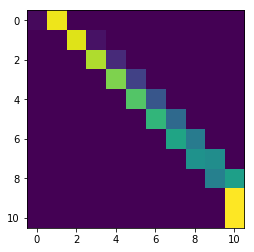

In [3]:
kkk = 5
W = model._warping_matrices()[kkk]
plt.imshow(W)

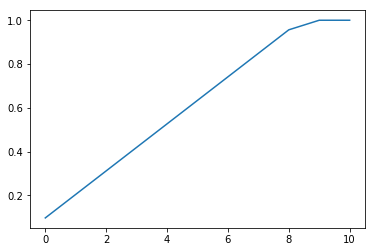

In [4]:
plt.plot(model.warping_funcs[kkk])

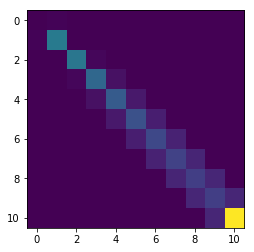

In [5]:
G = np.dot(W.T, W)
plt.imshow(G)

In [6]:
from affinewarp.utils import modf, _reduce_sum_assign, _reduce_sum_assign_matrix

T = model.n_timepoints
wfunc = model.warping_funcs[5]
lam, i = modf(wfunc * (T-1))

b = np.zeros(T)
_reduce_sum_assign(b, i, (1-lam)**2)
_reduce_sum_assign(b, i+1, lam**2)
print(b)

a = np.zeros(T-1)
_reduce_sum_assign(a, i, lam*(1-lam))
print(a)

[6.97470815e-04 9.47878125e-01 9.07800076e-01 7.75153610e-01
 6.63491789e-01 5.73512084e-01 5.05214496e-01 4.58599024e-01
 4.33665668e-01 4.30414429e-01 2.31650106e+00]
[0.0257122  0.         0.04498535 0.10623679 0.15664718 0.1962165
 0.22494476 0.24283197 0.24987812 0.24608321]


In [7]:
print(np.diag(G))
print(np.diag(G, -1))

[6.97470815e-04 9.47878125e-01 9.07800076e-01 7.75153610e-01
 6.63491789e-01 5.73512084e-01 5.05214496e-01 4.58599024e-01
 4.33665668e-01 4.30414429e-01 2.31650106e+00]
[0.0257122  0.         0.04498535 0.10623679 0.15664718 0.1962165
 0.22494476 0.24283197 0.24987812 0.24608321]


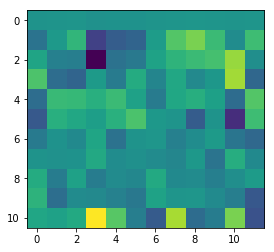

In [8]:
X = data[0]
plt.imshow(np.dot(W.T, X))

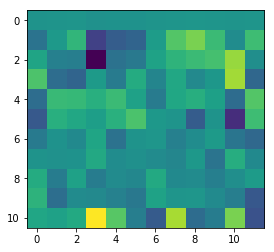

In [9]:
WtX = np.zeros(X.shape)
_reduce_sum_assign_matrix(WtX, i, (1-lam[:, None]) * X)
_reduce_sum_assign_matrix(WtX, i+1, lam[:, None] * X)
plt.imshow(WtX)

In [169]:
a = np.zeros(T-1)
add_elems(a, i, lam*(1-lam))
for t in range(T-1):
    a[t] = np.sum((lam*(1-lam))[i==t])
a

array([0.06563353, 0.        , 0.23277979, 0.15503174, 0.        ,
       0.18627618, 0.21504624, 0.        , 0.11038886, 0.24567703])

In [153]:
i

array([ 0,  0,  0,  2,  3,  5,  6,  8,  9, 10, 10], dtype=int32)

In [137]:
W[5][:5,1]

array([0.        , 0.        , 0.92937917, 0.        , 0.        ])

In [85]:
0.62087746**2 + 0.71057877**2 + 0.04203499**2

0.8921779490950646

In [117]:
W[5].sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [175]:
tref = np.linpace(0, 1, 3)
betas = np.array([.5, 2])
taus = np.array([.1, -.1])
np.array([np.clip(tref*b-t, 0, 1) for b, t in zip(betas, taus)])